<a href="https://colab.research.google.com/github/Ninjasri98/Medical-Insurance-Cost-Prediction/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [ ]:
#loading the data to a pandas dataframe
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
#1st 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features

In [ ]:
#checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [ ]:
#statistical  measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

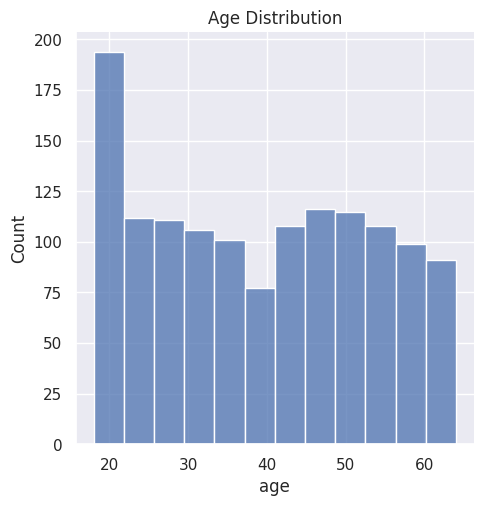

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

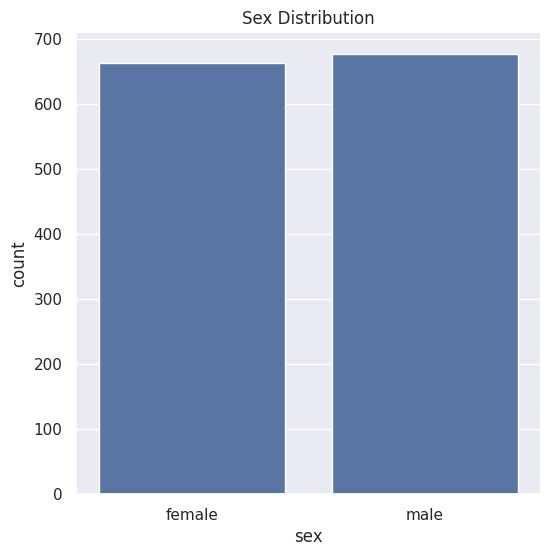

In [ ]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

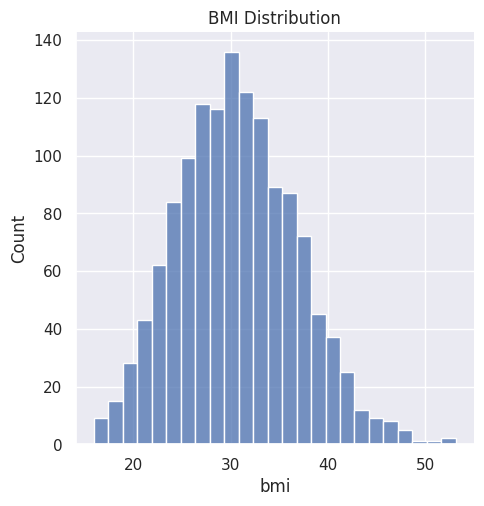

In [ ]:
#BMI Column
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

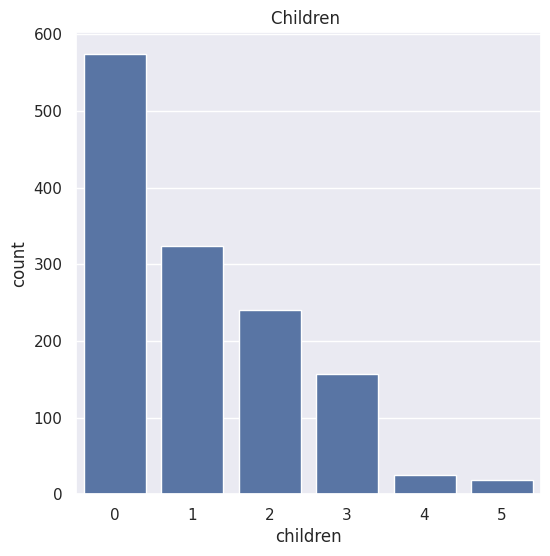

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children ')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


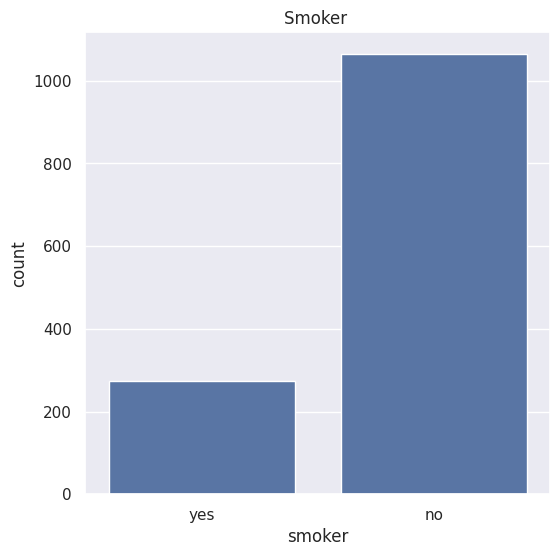

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker ')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


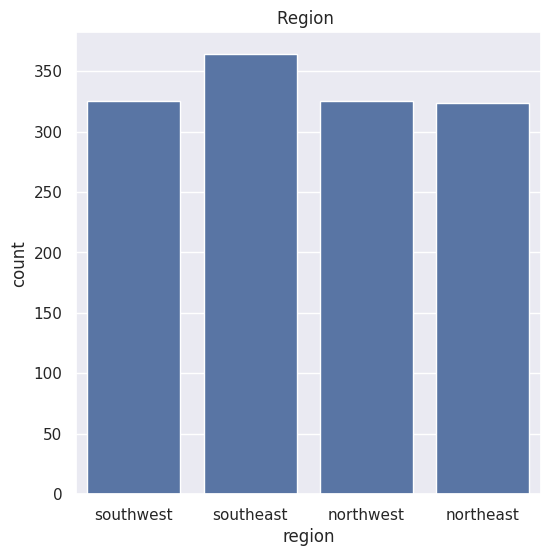

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region ')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

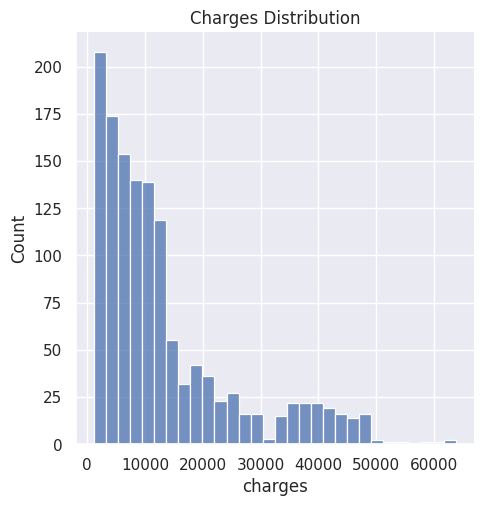

In [ ]:
#Charges Column
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Preprocessing

Encoding categorical features

In [ ]:
#encoding sex column
insurance_dataset.replace({'sex': {'male':0,'female': 1}},inplace=True)
#encoding smoker column
insurance_dataset.replace({'smoker': {'yes':0,'no': 1}},inplace=True)
#encoding region column
insurance_dataset.replace({'region': {'southeast':0,'southwest': 1,'northeast': 2,'northwest': 3}},inplace=True)

<ipython-input-23-462bf796aafb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex': {'male':0,'female': 1}},inplace=True)
<ipython-input-23-462bf796aafb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker': {'yes':0,'no': 1}},inplace=True)
<ipython-input-23-462bf796aafb>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

Splitting the features and target

In [ ]:
x = insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges']

Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Model Training

In [ ]:
#loading the model
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on training data
training_data_pred = regressor.predict(x_train)

In [ ]:
#R Squared Value
r2_train = metrics.r2_score(y_train,training_data_pred)

In [ ]:
print("R Sqaured Value on training data : ",r2_train)

R Sqaured Value on training data :  0.751505643411174


In [ ]:
#prediction on test data
test_data_pred = regressor.predict(x_test)

In [ ]:
#R Squared Value
r2_test= metrics.r2_score(y_test,test_data_pred)

In [ ]:
print("R Sqaured Value on training data : ",r2_test)

R Sqaured Value on training data :  0.7447273869684076


Building a Predictive system

In [ ]:
input_data = (56,1,39.82,0,1,0)
#changing to numpy array
input = np.asarray(input_data)
#reshaping the array
input_reshaped = input.reshape(1,-1)
prediction = regressor.predict(input_reshaped)
print("The insurance cost is : ",prediction[0])

The insurance cost is :  14700.709537159659


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
